<function matplotlib.pyplot.show(close=None, block=None)>

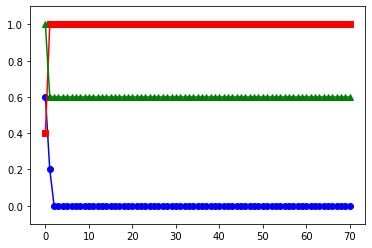

In [12]:
import pylab
import boolean2
from boolean2 import state, network, util, Model
text = """
#initial values 
#daf-18 = daf-12 = daf-3 = daf-5 = din-1s = sod-3 = tph-1 = ins-18 = daf-16 = pheromone = srbc = True
pheromone = True
#updating rules

aap-1 *= daf-2
age-1 *= aap-1 and daf-18
akt *= pdk-1
daf-11 *= (not srbc and not gpa-3) and daf-25
daf-2 *= ins-7 and (not ins-1 and not ins-18)
daf-12 *= not daf-9
daf-14 *= daf-8 and daf-1 and not pdp-1
daf-21 *= daf-21 or daf-2
daf-3 *= tph-1 or (not daf-8 and not daf-14)
daf-36 *= nhr-8
daf-37 *= pheromone
daf-4 *= daf-7 and daf-21
daf-5 *= daf-3
din-1s *= daf-12
odr-3 *= str-2
pde *= cgmp or gpa-3
pdk-1 *= age-1
sod-3 *= daf-16 and not daf-2
tax-4 *= cgmp and tax-2
tph-1 *= not daf-7 and daf-3
str-3 *= not pheromone
str-2 *= not pheromone
ins-7 *= daf-7 and not daf-16
ins-18 *= daf-16
daf-8 *= daf-8 and daf-1 and not pdp-1
daf-9 *= daf-12 or (not dhs-16 and not daf-36) or ncr or hsd-1
daf-7 *= daf-11 or cmk-1 or kin-8 or tax-4 or tph-1 or goa-1 or egl-30 or (not pheromone or not gpa-3)
daf-28 *= daf-7 and daf-11 and cmk-1 and not daf-16
daf-16 *= (daf-12 or daf-18 or daf-28 or ftt-2 or ifta-2 or swi-snf or daf-5) or (not ins-7 or not par-5 or not akt or not rle-1 or not tax-4 or not tph-1 or not hlh-30 or not odr-3)
daf-15 *= not daf-16
daf-1 *= (daf-4 and daf-7 and daf-21) or not bra-1
pheromone *= daf-22
ist-1 *= daf-2
dauer *= daf-16 or din-1s
srbc *= pheromone
"""

coll = util.Collector()
for i in range(10):
    sim = Model(mode='async', text=text)
    sim.initialize(missing= util.randbool)
    sim.iterate(steps=70)
    coll.collect( states=sim.states, nodes=sim.nodes )

avgs = coll.get_averages( normalize=True )
#print("daf-2",avgs["daf-2"])
#print("pheromone",avgs["pheromone"])

#for state in sim.states:
 #   print(state.pheromone)
#sim.report_cycles()
#sim.detect_cycles()

daf = pylab.plot(avgs["daf-2"], 'ob-')
dauer = pylab.plot(avgs["dauer"], 'sr-')
pher = pylab.plot(avgs["pheromone"], '^g-')
pylab.ylim((-0.1, 1.1))
pylab.show

In [87]:
aap-1=False, age-1=False, akt=False, bra-1=True, cgmp=False, cmk-1=True, daf-1=False, daf-11=False, daf-12=False, daf-14=False, daf-15=False, daf-16=True, daf-18=False, daf-2=False, daf-21=False, daf-22=True, daf-25=False, daf-28=False, daf-3=True, daf-36=True, daf-37=True, daf-4=False, daf-5=True, daf-7=True, daf-8=False, daf-9=True, dauer=True, dhs-16=False, din-1s=False, egl-30=True, ftt-2=True, goa-1=True, gpa-3=False, hlh-30=False, hsd-1=False, ifta-2=True, ins-1=False, ins-18=True, ins-7=False, ist-1=False, kin-8=False, ncr=True, nhr-8=True, odr-3=False, par-5=False, pde=False, pdk-1=False, pdp-1=True, pheromone=True, rle-1=False, sod-3=True, srbc=True, str-2=False, str-3=False, swi-snf=True, tax-2=True, tax-4=False, tph-1=False

SyntaxError: invalid syntax (<ipython-input-87-a740edac37d1>, line 1)

In [30]:
text = """
A = True

A *= B
B *= C
"""


In [43]:
import boolean2
from boolean2 import Model, util
from random import choice

#TARGETS = set( "pheromone dauer".split() )
def new_getvalue( state, name, p):
    """
    Called every time a node value is used in an expression. 
    It will override the value for the current step only.
    Returns random values for the node states
    """
    global TARGETS
    value = util.default_get_value( state, name, p ) 

    if name in TARGETS:
        # pick at random from True, False and original value
        return choice( [True, False, value] )
    else:
        return value 
    
def run( text, nodes, repeat, steps ):
    """
    Runs the simulation and collects the nodes into a collector, 
    a convenience class that can average the values that it collects.
    """
    coll = util.Collector()
    
    for i in range( repeat ):
        engine  = Model( mode='async', text=text )
        engine.RULE_GETVALUE = new_getvalue
        #print("new_getvalue", new_getvalue)
        # minimalist initial conditions, missing nodes set to false
        engine.initialize( missing=util.false )
        engine.iterate( steps=steps)
        coll.collect( states=engine.states, nodes=nodes )

    print('- completed')
    avgs = coll.get_averages( normalize=True )
    return avgs

if __name__ == '__main__':

    # read in the text
    #text = file( 'LGL.txt').read()

    # the nodes of interest that are collected over the run
    # NODES  = 'Apoptosis STAT3 FasL Ras'.split()
    
    # this collects the state of all nodes 
    NODES  = boolean2.all_nodes( text )

    #
    # raise this for better curves (will take about 2 seconds per repeat)
    # plots were made for REPEAT = 1000, STEPS=150
    #
    REPEAT = 15
    STEPS  = 10

    data = []
    
    print('- starting simulation with REPEAT=%s, STEPS=%s' % (REPEAT, STEPS))

    # a single overexpressed node
    #mtext = boolean2.modify_states( text=text, turnon=['Stimuli'] )
    avgs = run( text=text, repeat=REPEAT, nodes=NODES, steps=STEPS) 
    data.append( avgs )
    
#print(data.detect_cycles())
    
    #a = avgs["daf-"]
    #b = avgs["dauer"]
    
    #print("a is", a)
    #print("b is", b)
    #print(avgs["A"], avgs["B"], avgs["C"])
    #fname = 'd1-run.bin'
    #util.bsave( data, fname=fname )
    #print('- data saved into %s' % fname)
    #print("dauer ---",avgs["dauer"])
    #print("pheromone is ----", avgs["pheromone"])
    


- starting simulation with REPEAT=15, STEPS=10
- completed


In [47]:
avgs.report_cycles()

AttributeError: 'dict' object has no attribute 'report_cycles'

In [36]:
text="""

A *= B
B *= C
C *= A
""" 
eng = Model(text=text, mode='async')
eng.initialize( missing=util.false )
eng.iterate( steps=10)
for state in eng.states:
    print(state.A, state.B, state.C)
    
print(eng.detect_cycles())

False False False
False False False
False False False
False False False
False False False
False False False
False False False
False False False
False False False
False False False
False False False
(0, 1)


<ipython-input-30-5cc3d3fd8388>:5: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fc456e92670>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  pylab.legend( [p1, p2], ["a", "b"])
<ipython-input-30-5cc3d3fd8388>:5: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fc458552130>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  pylab.legend( [p1, p2], ["a", "b"])


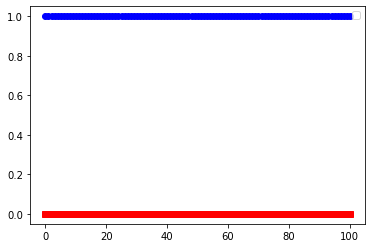

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [30]:
import pylab

p1 = pylab.plot(a, 'sr-')
p2 = pylab.plot(b, 'ob-')
pylab.legend( [p1, p2], ["a", "b"])

pylab.show()
#print(avgs["dauer"])

In [15]:
from boolean2 import Model, util

model = Model( text=text, mode ='async')
model.initialize(missing = util.false )
model.iterate (steps = 10)

for state in model.states:
    print(state.dauer)

False
False
True
True
True
True
True
True
True
True
True


In [16]:
model.report_cycles()
print(model.detect_cycles())

Steady state starting at index 2 -> State: aap-1=False, age-1=False, akt=False, bra-1=False, cgmp=False, cmk-1=False, daf-1=True, daf-11=False, daf-12=False, daf-14=False, daf-15=False, daf-16=True, daf-18=False, daf-2=False, daf-21=False, daf-22=False, daf-25=False, daf-28=False, daf-3=True, daf-36=False, daf-37=False, daf-4=False, daf-5=True, daf-7=True, daf-8=False, daf-9=True, dauer=True, dhs-16=False, din-1s=False, egl-30=False, ftt-2=False, goa-1=False, gpa-3=False, hlh-30=False, hsd-1=False, ifta-2=False, ins-1=False, ins-18=True, ins-7=False, ist-1=False, kin-8=False, ncr=False, nhr-8=False, odr-3=True, par-5=False, pde=False, pdk-1=False, pdp-1=False, pheromone=False, rle-1=False, sod-3=True, srbc=False, str-2=True, str-3=True, swi-snf=False, tax-2=False, tax-4=False, tph-1=False
(2, 1)


In [25]:
coll = util.Collector()

for i in range(3):
    model = Model (text=text, mode='async')
    model.initialize(missing = util.false )
    model.iterate(steps = 5)
    
    nodes = model.nodes
    coll.collect(states=model.states, nodes=nodes)
    
avgs = coll.get_averages(normalize = True)
print (avgs)

{'daf-25': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'daf-9': [0.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'srbc': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'daf-3': [0.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'dhs-16': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'daf-15': [0.0, 0.6666666666666666, 0.0, 0.0, 0.0, 0.0], 'ncr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'age-1': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'ins-1': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'daf-22': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'pdk-1': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'ins-18': [0.0, 0.3333333333333333, 1.0, 1.0, 1.0, 1.0], 'pdp-1': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'hsd-1': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'daf-12': [0.0, 0.6666666666666666, 0.0, 0.0, 0.0, 0.0], 'aap-1': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'pde': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'goa-1': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'gpa-3': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'swi-snf': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'daf-4': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'dauer': [0.0, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0], 'hlh-30': [0.0, 0.0, 0.0, 0.0, 0.0

<ipython-input-27-705e5cfffbdb>:7: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fcd9010b5e0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  pylab.legend( [p1,p2], ["dauer","pheromone"])
<ipython-input-27-705e5cfffbdb>:7: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fcd9010b940>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  pylab.legend( [p1,p2], ["dauer","pheromone"])


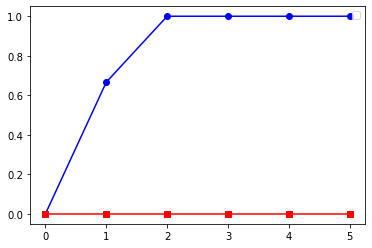

[0.0, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0]


In [27]:
import pylab
val1 = avgs["dauer"]
val2 = avgs["pheromone"]

p1 = pylab.plot(val1, 'ob-')
p2 = pylab.plot(val2, 'sr-')
pylab.legend( [p1,p2], ["dauer","pheromone"])

pylab.show()
print(avgs["dauer"])

In [2]:
model = Model( text=text, mode='async')

# generates all states, set limit to a value to keep only the first that many states
# when limit is a number it will take the first that many initial states
initializer = state.all_initial_states( model.nodes, limit=None )

# the data is the inital data, the func is the initializer
for data, initfunc in initializer:
    # shows the initial values
    print(data)
    model.initialize(missing=initfunc)
    model.iterate(5)

NameError: name 'Model' is not defined